In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

In [2]:
def bondValue(coupon, T, rate, par):
    """
    coupon = semi-annual coupon payment
    T = time to maturity in years
    r = float or vector of floats for semi-annual rate
    par = par value
    """
    return coupon/rate + (par - coupon/rate)*(1+rate)**(-2*T)

In [3]:
# These sanity checks taken from the text
assert np.isclose(bondValue(30,20,0.03,1000), 1000)
assert np.isclose(1.035*bondValue(30,20,0.035,1000), 924.49)
assert np.isclose(1.025*bondValue(30,20,0.025,1000), 1153.65)
_result = bondValue(30,20,np.array([0.03,0.035,0.025]),1000)
_expected = np.array([1000, 924.49/1.035, 1153.65/1.025])
assert all(np.isclose(x,y) for x,y in zip(_result, _expected))

Implied Yield for a price of 1200 is 0.0323981


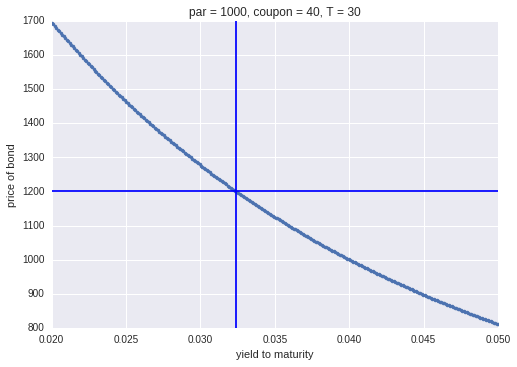

In [4]:
# Fig 3.1
from scipy.interpolate import interp1d
def draw():
    price = 1200
    C = 40
    T = 30
    par = 1000
    r = np.linspace(0.02,0.05,300)
    value = bondValue(C,T,r,par)
    f = interp1d(value,r, kind='cubic')
    implied_yield = f([price])[0]
    print("Implied Yield for a price of 1200 is {:.7f}".format(implied_yield))
    plt.plot(r,value,'.')
    plt.axvline(x=implied_yield)
    plt.axhline(y=price)
    plt.xlabel("yield to maturity")
    plt.ylabel("price of bond")
    plt.title("par = 1000, coupon = 40, T = 30")
draw()

In [5]:
from scipy.optimize import brentq
def findRoot(coupon, T, par, price):
    def f(r): return bondValue(coupon,T,r,par) - price
    return brentq(f,0.01,0.99)

In [6]:
# Problem 3
findRoot(40,30,1000,1200)

0.032398128448696245

In [7]:
# Problem 4
findRoot(280,8,10000,9800)

0.02958719645796272

In [8]:
maturity = pd.read_csv('../data/mk.maturity.csv')
zero = pd.read_csv('../data/mk.zero2.csv')

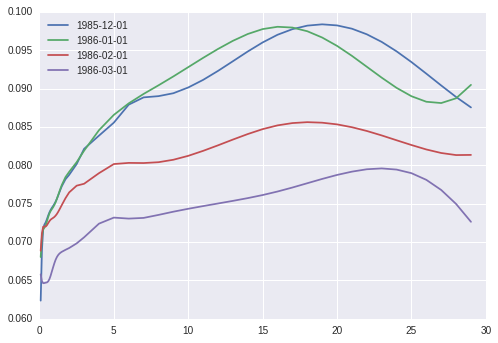

In [9]:
def draw():
    plt.plot(maturity['Maturity'].values,zero.iloc[4,1:56].values, label=zero.iloc[4,0])
    plt.plot(maturity['Maturity'].values,zero.iloc[5,1:56].values, label=zero.iloc[5,0])
    plt.plot(maturity['Maturity'].values,zero.iloc[6,1:56].values, label=zero.iloc[6,0])
    plt.plot(maturity['Maturity'].values,zero.iloc[7,1:56].values, label=zero.iloc[7,0])
    plt.legend(loc='best')
draw()

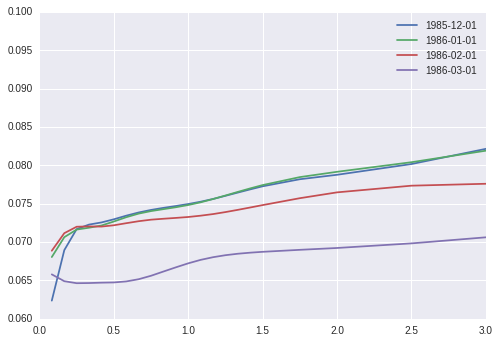

In [10]:
# Problem 5
# Short end
# Between December 1985 and March 1986, the yield curve 'flattens out' and 'inverts'. 
def draw():
    plt.plot(maturity['Maturity'].values,zero.iloc[4,1:56].values, label=zero.iloc[4,0])
    plt.plot(maturity['Maturity'].values,zero.iloc[5,1:56].values, label=zero.iloc[5,0])
    plt.plot(maturity['Maturity'].values,zero.iloc[6,1:56].values, label=zero.iloc[6,0])
    plt.plot(maturity['Maturity'].values,zero.iloc[7,1:56].values, label=zero.iloc[7,0])
    plt.legend(loc='best')
    plt.xlim(0,3)
draw()

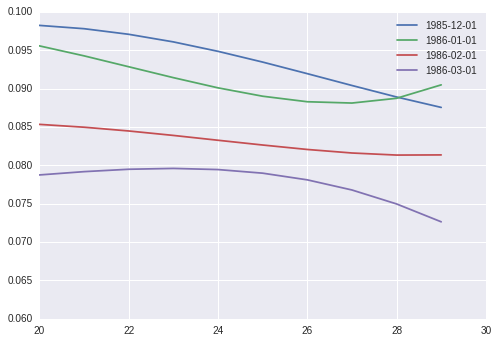

In [11]:
# Problem 5
# Long end
# Between December 1985 and March 1986, the yield curve mostly stays inverted on the long end but drops. 
def draw():
    plt.plot(maturity['Maturity'].values,zero.iloc[4,1:56].values, label=zero.iloc[4,0])
    plt.plot(maturity['Maturity'].values,zero.iloc[5,1:56].values, label=zero.iloc[5,0])
    plt.plot(maturity['Maturity'].values,zero.iloc[6,1:56].values, label=zero.iloc[6,0])
    plt.plot(maturity['Maturity'].values,zero.iloc[7,1:56].values, label=zero.iloc[7,0])
    plt.legend(loc='best')
    plt.xlim(20,30)
draw()

In [12]:
# inspect to find the desired r

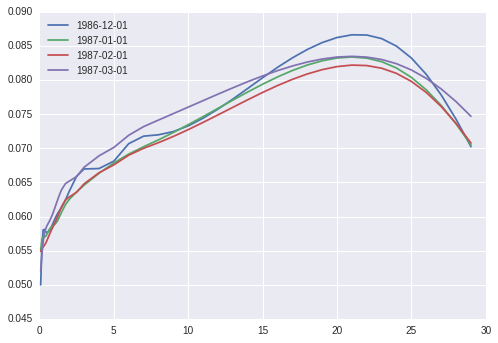

In [13]:
# Problem 6
# Short end
# adjust the plt.xlim(a,b) call to zoom in on a specific section of the curve
def draw():
    start = '1986-12-01'
    start_row = zero[zero.iloc[:,0]==start].index[0]
    plt.plot(maturity['Maturity'].values,zero.iloc[start_row,1:56].values, label=zero.iloc[start_row,0])
    plt.plot(maturity['Maturity'].values,zero.iloc[start_row+1,1:56].values, label=zero.iloc[start_row+1,0])
    plt.plot(maturity['Maturity'].values,zero.iloc[start_row+2,1:56].values, label=zero.iloc[start_row+2,0])
    plt.plot(maturity['Maturity'].values,zero.iloc[start_row+3,1:56].values, label=zero.iloc[start_row+3,0])
    plt.legend(loc='best')
    #plt.xlim(0,3)
draw()

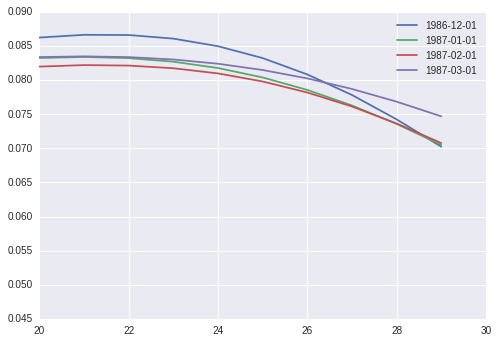

In [14]:
# Problem 6
# Long end
def draw():
    start = '1986-12-01'
    start_row = zero[zero.iloc[:,0]==start].index[0]
    plt.plot(maturity['Maturity'].values,zero.iloc[start_row,1:56].values, label=zero.iloc[start_row,0])
    plt.plot(maturity['Maturity'].values,zero.iloc[start_row+1,1:56].values, label=zero.iloc[start_row+1,0])
    plt.plot(maturity['Maturity'].values,zero.iloc[start_row+2,1:56].values, label=zero.iloc[start_row+2,0])
    plt.plot(maturity['Maturity'].values,zero.iloc[start_row+3,1:56].values, label=zero.iloc[start_row+3,0])
    plt.legend(loc='best')
    plt.xlim(20,30)
draw()

I have handwritten solutions to the  Exercises that I can share upon request, and I may type a few up into latex to post here. But we'll see